Summary:
* decision tree is very fast.
* changing min_samples_split will change precision.
* the default criterion 'gini' is better than 'entropy' for all 4 min_samples_split numbers tried here.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import preprocessing

import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
labels = train.target.values
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
train = train.drop('id', axis=1)
train = train.drop('target', axis=1)

# split 80%
X, X_test, y, y_test = train_test_split(
    train.values, labels.astype('int32'), test_size=0.20, random_state=1234)

In [8]:
from time import time
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split=50)
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))

train time 1.333726167678833, predict time 0.003587007522583008, predict proba time 0.0036513805389404297


In [9]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

0.720885484891
[ 0.41196013  0.70532544  0.48269352  0.47563805  0.93784278  0.9051481
  0.52690167  0.80890973  0.71633238]


## min_samples_split=20

In [10]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 1.3822956085205078, predict time 0.0037908554077148438, predict proba time 0.003988504409790039
0.721495109327
[ 0.38167939  0.6971935   0.48138639  0.46169772  0.91666667  0.90020935
  0.54863813  0.82509047  0.75602094]


### min_samples_split=100

In [11]:
clf = tree.DecisionTreeClassifier(min_samples_split=100)
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 1.3023619651794434, predict time 0.003470897674560547, predict proba time 0.0034737586975097656
0.718414020744
[ 0.42962963  0.69066367  0.47937132  0.52957746  0.93115942  0.90259285
  0.5625      0.80641399  0.69540769]


## Export and visulize

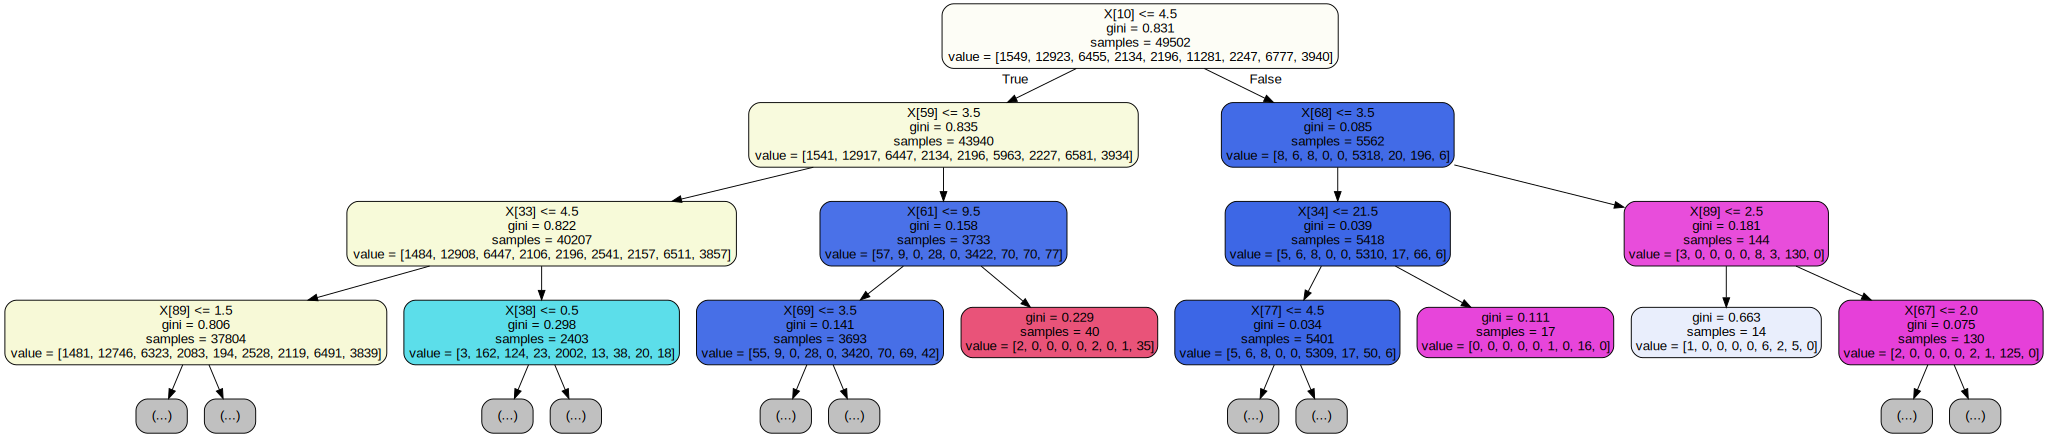

In [18]:
# install python package and ubuntu package
#sudo -H pip3 install  graphviz
#apti graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, max_depth=3, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

In [21]:
clf = tree.DecisionTreeClassifier(min_samples_split=20, criterion = 'entropy')
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 1.154313087463379, predict time 0.00397491455078125, predict proba time 0.003719806671142578
0.711403485464
[ 0.35278515  0.68127148  0.48336728  0.5012285   0.9584121   0.89299407
  0.51361162  0.80335731  0.72376238]


In [22]:
clf = tree.DecisionTreeClassifier(min_samples_split=50, criterion = 'entropy')
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 1.070302963256836, predict time 0.0036058425903320312, predict proba time 0.0036122798919677734
0.711437212951
[ 0.41034483  0.67826802  0.50584795  0.51754386  0.93103448  0.89196676
  0.49288256  0.79332553  0.7151277 ]


In [23]:
clf = tree.DecisionTreeClassifier(min_samples_split=100, criterion = 'entropy')
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 0.9972431659698486, predict time 0.0037200450897216797, predict proba time 0.003404855728149414
0.701806509566
[ 0.45535714  0.67530696  0.5095729   0.52614379  0.94795539  0.8895409
  0.488       0.73205742  0.68222443]


In [24]:
clf = tree.DecisionTreeClassifier(min_samples_split=5, criterion = 'entropy')
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 1.2259674072265625, predict time 0.003951072692871094, predict proba time 0.0040149688720703125
0.71164186683
[ 0.32599119  0.69182578  0.48090615  0.42718447  0.94639556  0.89890421
  0.48049645  0.81176471  0.74297607]


In [25]:
clf = tree.DecisionTreeClassifier(min_samples_split=5, criterion = 'gini')
t0 = time()
clf.fit(X,y)
t1 = time()
y_pred = clf.predict(X_test)
t2 = time()
y_pred_proba = clf.predict_proba(X_test)
t3 = time()
print("train time %s, predict time %s, predict proba time %s" %(t1-t0, t2-t1, t3-t2))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))

train time 1.4221289157867432, predict time 0.004398822784423828, predict proba time 0.004254817962646484
0.714155875181
[ 0.37062937  0.69850015  0.45298095  0.43115942  0.9365942   0.89742686
  0.49530957  0.833125    0.74157303]
